In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read file
df=pd.read_csv("train.csv",index_col=0)
df['label']=df['label'].astype('object')

print('# of elements:',len(df))
df.head()

# of elements: 20000


,age,euducation_level,job,marital,have_credit_card,have_housing_loan,have_personal_loan,connect_method,previous_connect_month,previous_connect_weekday,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,last_campaign_outcomes,employment_rate,consumer_price_index,consumer_confidence_index,label
index,,,,,,,,,,,,,,,,,,
0,39.0,high,employment,married,no,no,no,cellular,November,Tuesday,1.0,-1.0,0.0,nonexistent,59.9,93.200,-42.0,0
1,26.0,medium,employment,single,no,yes,no,telephone,April,Wednesday,3.0,-1.0,0.0,nonexistent,58.2,93.075,-47.1,1
2,29.0,high,employment,married,no,yes,no,telephone,June,Wednesday,4.0,-1.0,0.0,nonexistent,61.4,94.465,-41.8,1
3,57.0,medium,employment,married,unknown,yes,no,telephone,May,Thursday,1.0,-1.0,0.0,nonexistent,61.1,93.994,-36.4,0
4,23.0,high,employment,single,no,yes,no,cellular,Octobor,Friday,1.0,-1.0,0.0,nonexistent,56.6,92.431,-26.9,1


In [4]:
df.describe()

,age,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,employment_rate,consumer_price_index,consumer_confidence_index
count,19992.000000,19994.000000,19995.000000,19988.000000,20000.000000,20000.000000,20000.000000
mean,40.078081,2.567070,-0.683921,0.205023,60.020035,98.199867,-40.527810
std,26.277886,2.710332,1.691708,0.544962,1.593336,656.191392,4.704465
min,18.000000,1.000000,-1.000000,0.000000,56.600000,92.201000,-50.800000
25%,32.000000,1.000000,-1.000000,0.000000,58.200000,93.075000,-42.700000
50%,38.000000,2.000000,-1.000000,0.000000,61.100000,93.444000,-41.800000
75%,47.000000,3.000000,-1.000000,0.000000,61.400000,93.994000,-36.400000
max,3444.000000,56.000000,27.000000,7.000000,61.400000,92893.000000,-26.900000


In [5]:
#移除离群值
df[['age', 'consumer_price_index']]=df.mask(df.sub(df.mean()).div(df.std()).abs().gt(3))[['age','consumer_price_index']]
df.describe()

,age,campaign_connect_times,after_campaign_connect_day,before_campaign_connect_times,employment_rate,consumer_price_index,consumer_confidence_index
count,19991.000000,19994.000000,19995.000000,19988.000000,20000.000000,19999.000000,20000.000000
mean,39.907809,2.567070,-0.683921,0.205023,60.020035,93.559895,-40.527810
std,10.531325,2.710332,1.691708,0.544962,1.593336,0.581956,4.704465
min,18.000000,1.000000,-1.000000,0.000000,56.600000,92.201000,-50.800000
25%,32.000000,1.000000,-1.000000,0.000000,58.200000,93.075000,-42.700000
50%,38.000000,2.000000,-1.000000,0.000000,61.100000,93.444000,-41.800000
75%,47.000000,3.000000,-1.000000,0.000000,61.400000,93.994000,-36.400000
max,100.000000,56.000000,27.000000,7.000000,61.400000,94.767000,-26.900000


In [6]:
#CatBoost
df_CB=df.dropna()
X_CB=df_CB.drop('label',axis=1)
y_CB=df_CB.label.tolist()
test_CB=pd.read_csv('test.csv',index_col=0)
test_CB.fillna('NAN',inplace=True)

In [7]:
from catboost import CatBoostClassifier
CB=CatBoostClassifier(cat_features=[1,2,3,4,5,6,7,8,9,13],silent=True,class_weights=[1,9])
CB.fit(X_CB,y_CB)
prediction_CB=CB.predict(test_CB)

In [8]:
df_LGBM=df.copy()
test_LGBM=pd.read_csv('test.csv',index_col=0)

In [9]:
levels=['low','medium','high']
level_map={}
for i,l in enumerate(levels):
    level_map[l]=i+1

months=['January','Febuary','March','April','May','June','July','August','September','Octobor','November','December']
month_map={}
for i,m in enumerate(months):
    month_map[m]=i+1

days=['Monday','Tuesday','Wednesday','Thursday','Friday']
day_map={}
for i,d in enumerate(days):
    day_map[d]=i+1


In [10]:

#mapper
df_LGBM.loc[:,'euducation_level']=df_LGBM[['euducation_level']].applymap(lambda x: level_map[x], na_action='ignore')


In [11]:
test_LGBM.loc[:,'euducation_level']=test_LGBM[['euducation_level']].applymap(lambda x: level_map[x],na_action='ignore')

df_LGBM.loc[:,'previous_connect_month']=df_LGBM[['previous_connect_month']].applymap(lambda x: month_map[x],na_action='ignore')
test_LGBM.loc[:,'previous_connect_month']=test_LGBM[['previous_connect_month']].applymap(lambda x: month_map[x],na_action='ignore')

df_LGBM.loc[:,'previous_connect_weekday']=df_LGBM[['previous_connect_weekday']].applymap(lambda x: day_map[x],na_action='ignore')
test_LGBM.loc[:,'previous_connect_weekday']=test_LGBM[['previous_connect_weekday']].applymap(lambda x: day_map[x],na_action='ignore')

In [12]:
cat_cols=['job','marital','have_credit_card','have_housing_loan','have_personal_loan','connect_method','last_campaign_outcomes']
for col in cat_cols:
    mapper={v: k for k,v in enumerate(df_LGBM[col].unique())}
    df_LGBM[col]=df_LGBM[col].map(mapper).astype('category')
    test_LGBM[col]=test_LGBM[col].map(mapper).astype('category')


In [13]:
X_LGBM=df_LGBM.drop('label',axis=1)
y_LGBM=df_LGBM.label.values.astype('int')


In [14]:
from lightgbm.sklearn import LGBMClassifier
LGBM=LGBMClassifier(scale_pos_weight=10.5)
LGBM.fit(X_LGBM,y_LGBM)
prediction_LGBM=LGBM.predict(test_LGBM)

In [15]:
import miceforest as mf
import sys
sys.setrecursionlimit(4000)
df_MICE=pd.concat([df_LGBM,test_LGBM])
df_MICE.drop('label',axis=1,inplace=True)

cat_cols=['euducation_level','job','marital','have_credit_card','have_housing_loan','have_personal_loan','connect_method',
'previous_connect_month','previous_connect_weekday','last_campaign_outcomes']

df_MICE[cat_cols]=df_MICE[cat_cols].astype('category')

kernel=mf.ImputationKernel(
    data=df_MICE,
    datasets=1,
    save_all_iterations=True,
    random_state=123,
)

kernel.mice(iterations=5,n_estimators=100,verbose=True)

df_NN=kernel.complete_data(0)[:20000]
test_NN=kernel.complete_data(0)[20000:]
df_NN['label']=df_LGBM.label



Dataset 0
1  | consumer_price_index | after_campaign_connect_day | age | campaign_connect_times | before_campaign_connect_times | euducation_level | previous_connect_month | previous_connect_weekday
2  | consumer_price_index | after_campaign_connect_day | age | campaign_connect_times | before_campaign_connect_times | euducation_level | previous_connect_month | previous_connect_weekday
3  | consumer_price_index | after_campaign_connect_day | age | campaign_connect_times | before_campaign_connect_times | euducation_level | previous_connect_month | previous_connect_weekday
4  | consumer_price_index | after_campaign_connect_day | age | campaign_connect_times | before_campaign_connect_times | euducation_level | previous_connect_month | previous_connect_weekday
5  | consumer_price_index | after_campaign_connect_day | age | campaign_connect_times | before_campaign_connect_times | euducation_level | previous_connect_month | previous_connect_weekday


In [16]:
cat_features=[1,2,3,4,5,6,7,8,9,12,13,14,15,16]
con_features=[0,1,8,9,10,11,12,14,15,16]
print('Categorical:')
for i in cat_features:
    print('|-',df.columns[i])
print('\nContinuous:')
for i in con_features:
    print('|-',df.columns[i])


Categorical:
|- euducation_level
|- job
|- marital
|- have_credit_card
|- have_housing_loan
|- have_personal_loan
|- connect_method
|- previous_connect_month
|- previous_connect_weekday
|- before_campaign_connect_times
|- last_campaign_outcomes
|- employment_rate
|- consumer_price_index
|- consumer_confidence_index

Continuous:
|- age
|- euducation_level
|- previous_connect_month
|- previous_connect_weekday
|- campaign_connect_times
|- after_campaign_connect_day
|- before_campaign_connect_times
|- employment_rate
|- consumer_price_index
|- consumer_confidence_index


In [17]:
#train
X_cat=df_NN.iloc[:,cat_features].values
X_con=df_NN.iloc[:,con_features].values
y_NN=df_NN.label.values.astype(np.float32)
y_NN=y_NN.reshape((len(y_NN),1))#reshape target to 2d array

#test
test_cat=test_NN.iloc[:,cat_features].values
test_con=test_NN.iloc[:,con_features].values


In [18]:
#label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

X_cat_enc,test_cat_enc=list(),list()
#label encode each conlumn
for i in range(X_cat.shape[1]):
    LE=LabelEncoder()
    LE.fit(X_cat[:,i])

    train_enc=LE.transform(X_cat[:,i])
    test_enc=LE.transform(test_cat[:,i])

    X_cat_enc.append(train_enc)
    test_cat_enc.append(test_enc)



In [19]:
#Standardization
from sklearn.preprocessing import StandardScaler

SS=StandardScaler()
SS.fit(X_con)

X_con_std=SS.transform(X_con).astype(np.float32)
test_con_std=SS.transform(test_con).astype(np.float32)

In [20]:
#Build Model
from numpy import unique
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Embedding,concatenate,Reshape,Dropout
import tensorflow as tf
tf.random.set_seed(999)

In [21]:
in_categorical=list()
em_categorical=list()
for i in range(len(X_cat_enc)):
    n_labels=len(unique(X_cat_enc[i]))
    in_layer=Input(shape=(1,))
    em_layer=Embedding(n_labels,10)(in_layer)
    #store layers
    in_categorical.append(in_layer)
    em_categorical.append(em_layer)

mergel=concatenate(em_categorical)
reshape=Reshape((140,))(mergel)
dense1=Dense(10,activation='relu',kernel_initializer='he_normal')(reshape)

in_continuous=Input(shape=(X_con_std.shape[-1],))
dense2=Dense(20,activation='relu',kernel_initializer='he_normal')(in_continuous)
dense3=Dense(10,activation='relu',kernel_initializer='he_normal')(dense2)

#concat all
merge2=concatenate([dense1,dense3])
dense4=Dense(10,activation='relu',kernel_initializer='he_normal')(merge2)
output=Dense(1,activation='sigmoid')(dense4)

model=Model(inputs=[in_categorical,in_continuous],outputs=output)
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

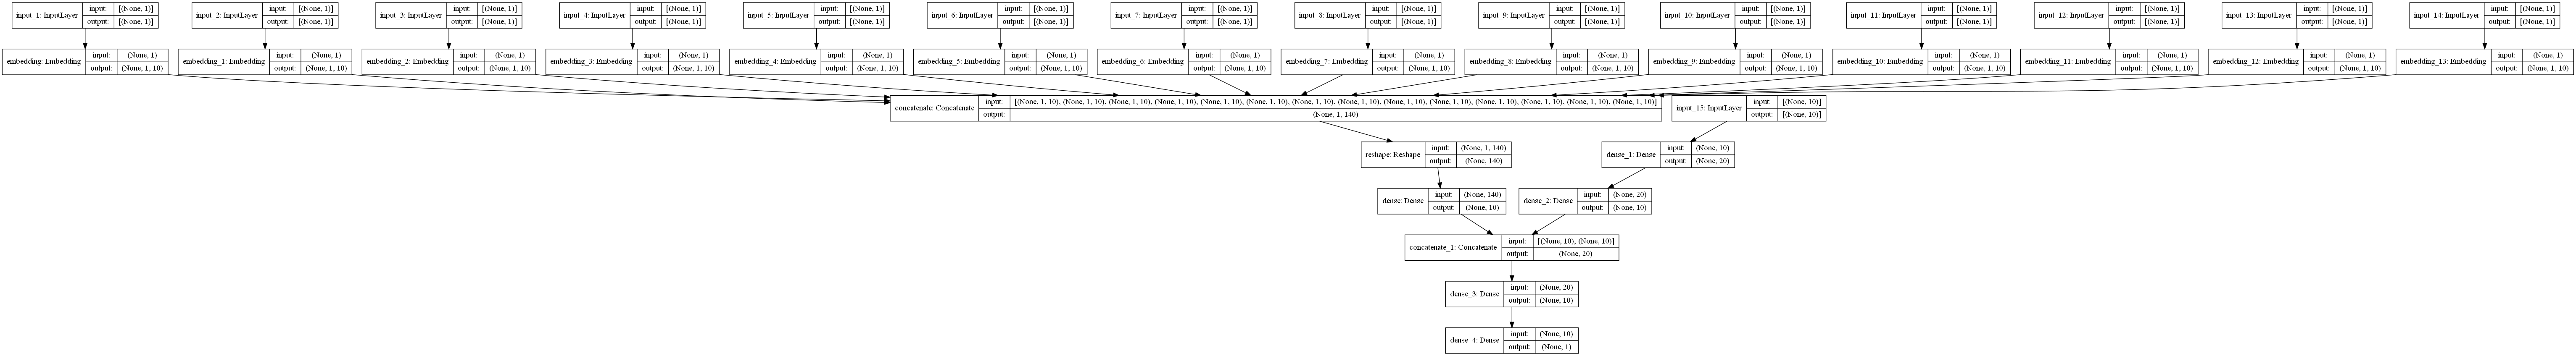

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [23]:
#train and predict
model.compile(loss='binary_crossentropy',optimizer='adam')
history=model.fit([X_cat_enc,X_con_std],y_NN,epochs=30,batch_size=256,verbose=1,class_weight={0:1,1:9})
prediction_NN=model.predict([test_cat_enc,test_con_std])
prediction_NN=[int(i>.5) for i in prediction_NN.ravel()]

Epoch 1/30
79/79 [==============================] - 2s 2ms/step - loss: 1.3892
Epoch 2/30
79/79 [==============================] - 0s 2ms/step - loss: 1.1651
Epoch 3/30
79/79 [==============================] - 0s 2ms/step - loss: 1.1155
Epoch 4/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0957
Epoch 5/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0834
Epoch 6/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0761
Epoch 7/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0701
Epoch 8/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0687
Epoch 9/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0645
Epoch 10/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0625
Epoch 11/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0601
Epoch 12/30
79/79 [==============================] - 0s 2ms/step - loss: 1.0587
Epoch 13/30
79/79 [==============================

In [24]:
#Voting
result=np.where(prediction_CB+prediction_LGBM+prediction_NN>=2,1,0)


In [25]:
#Save Result
outfile=pd.read_csv('sample.csv')
outfile.label=result
outfile.to_csv('submission.csv',index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

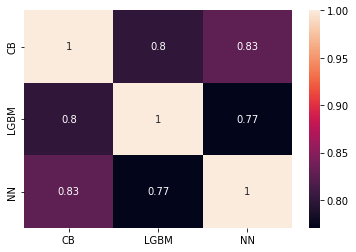

In [26]:
#import Correlation between three methods
import seaborn as sns
import matplotlib.pyplot as plt

d={'CB':prediction_CB,'LGBM':prediction_LGBM,'NN':prediction_NN}
pred_df=pd.DataFrame(data=d)

sns.heatmap(pred_df.astype(float).corr(),annot=True)
plt.show

In [1]:
from catboost import CatBoostClassifier
# Initialize data
cat_features = [0,1,5]
train_data = [["a","b",1,4,5,6],["a","b",4,5,6,7],["c","d",30,40,50,60]]
train_labels = [1,1,-1]
test_data = [["a","b",2,4,6,8],["a","d",1,4,50,60]]
# Initialize CatBoostClassifier
model = CatBoostClassifier(
iterations=2, 
learning_rate=1, 
depth=2, loss_function='Logloss')
# Fit model
model.fit(train_data, train_labels, cat_features)
# Get predicted classes
preds_class = model.predict(test_data)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(test_data)
# Get predicted RawFormulaVal
preds_raw = model.predict(test_data, prediction_type='RawFormulaVal')
preds_proba


0:	learn: 0.5800330	total: 77.8ms	remaining: 77.8ms
1:	learn: 0.5225983	total: 87.4ms	remaining: 0us


array([[0.39701087, 0.60298913],
       [0.50540603, 0.49459397]])